In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(print_changed_only=False)
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('output_merged.csv')
df = df.dropna()
df

,Movie Id,Movie Name,Director,Lead_Actor,Lead_Actress,Runtime (.),IMDb_Rating,Language,Animated,Action,...,Trailer Views,Trailer Likes (K),Follower Count (Lead Actor),Follower Count (Lead Actress),Follower Count (Director),Popularity of Actor Male (POAM),Popularity of Actress Female (POAF),Popularity of Director (POD),CSS,Verdict
0,0,interstellar,Christopher Nolan,Matthew David McConaughey,Anne Jacqueline Hathaway,169,8.7,English,Live Action,1,...,36314005.0,202,9000000,31000000,97000,0.60,0.29,0.80,0.300,Blockbuster
1,1,thedarkknight,Christopher Nolan,Christian Bale,Anne Hathaway,152,9.0,English,Live Action,1,...,180000000.0,185,422000,31000000,97000,0.32,0.39,0.80,0.400,Hit
2,2,theekenruddhaswasrajasthan,Joydeep Mukherjee,Anirban Chakrabarti,Naomi Harris,121,6.7,Bengali,Live Action,0,...,1419093.0,92,15000,467000,2064,0.50,0.23,0.50,0.238,Superhit
3,3,lagaanonceuponatimeinindia,Ashutosh Gowariker,Aamir Khan,Gracy Singh,224,8.1,Hindi,Live Action,0,...,10460532.0,86,2000000,146000,196,0.13,0.23,0.43,0.350,Blockbuster
4,4,ramsetu,Abhishek Sharma,Akshay Kumar,Jacqueline Fernandez,143,5.2,Hindi,Live Action,0,...,41621819.0,796,67000000,69000000,209000,0.33,0.46,0.25,0.350,Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2124,dummaarodum,Rohan Sippy,Jessica Chastain,Joanne Whalley,128,6.2,English,Live Action,0,...,25004927.0,4238,26000,493000,2000000,0.16,0.14,0.33,0.400,Blockbuster
1890,2126,sawii,Darren Lynn Bousman,Abhishek Bachchan,Shirley Henderson,93,6.6,Hindi,Live Action,0,...,42061546.0,3952,8000000,387000,391,0.42,0.37,0.48,0.300,Average
1891,2127,10cloverfieldlane,Dan Trachtenberg,Patrick Wilson,Rani Mukerji,103,7.2,English,Live Action,0,...,74493329.0,4207,117,6000000,342000,0.58,0.53,0.55,0.450,Average
1892,2128,jackassthemovie,Jeff Tremaine,Donnie Wahlberg,Flora Cross,85,6.6,English,Live Action,1,...,38980321.0,3998,26000000,22000000,10000,0.40,0.80,0.60,0.500,Average


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_verdict = LabelEncoder()

In [5]:
df['Animated'] = le.fit_transform(df['Animated'])
df['Lead_Actor'] = le.fit_transform(df['Lead_Actor'])
df['Lead_Actress'] = le.fit_transform(df['Lead_Actress'])
df['Language'] = le.fit_transform(df['Language'])
df['Director'] = le.fit_transform(df['Director'])
df['Music_Director'] = le.fit_transform(df['Music_Director'])
df['CBFC/MPAA'] = le.fit_transform(df['CBFC/MPAA'])
df['Verdict'] = le_verdict.fit_transform(df['Verdict'])
df

,Movie Id,Movie Name,Director,Lead_Actor,Lead_Actress,Runtime (.),IMDb_Rating,Language,Animated,Action,...,Trailer Views,Trailer Likes (K),Follower Count (Lead Actor),Follower Count (Lead Actress),Follower Count (Director),Popularity of Actor Male (POAM),Popularity of Actress Female (POAF),Popularity of Director (POD),CSS,Verdict
0,0,interstellar,144,515,58,169,8.7,1,8,1,...,36314005.0,202,9000000,31000000,97000,0.60,0.29,0.80,0.300,1
1,1,thedarkknight,144,148,56,152,9.0,1,8,1,...,180000000.0,185,422000,31000000,97000,0.32,0.39,0.80,0.400,4
2,2,theekenruddhaswasrajasthan,471,45,685,121,6.7,0,8,0,...,1419093.0,92,15000,467000,2064,0.50,0.23,0.50,0.238,7
3,3,lagaanonceuponatimeinindia,61,3,310,224,8.1,2,8,0,...,10460532.0,86,2000000,146000,196,0.13,0.23,0.43,0.350,1
4,4,ramsetu,2,19,358,143,5.2,2,8,0,...,41621819.0,796,67000000,69000000,209000,0.33,0.46,0.25,0.350,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2124,dummaarodum,793,367,426,128,6.2,1,8,0,...,25004927.0,4238,26000,493000,2000000,0.16,0.14,0.33,0.400,1
1890,2126,sawii,174,8,868,93,6.6,2,8,0,...,42061546.0,3952,8000000,387000,391,0.42,0.37,0.48,0.300,0
1891,2127,10cloverfieldlane,165,590,770,103,7.2,1,8,0,...,74493329.0,4207,117,6000000,342000,0.58,0.53,0.55,0.450,0
1892,2128,jackassthemovie,387,212,281,85,6.6,1,8,1,...,38980321.0,3998,26000000,22000000,10000,0.40,0.80,0.60,0.500,0


In [6]:
max_encoded_value = max(le_verdict.classes_)
print(le_verdict.classes_)
max_encoded_value

['Average' 'Blockbuster' 'Disaster' 'Flop' 'Hit' 'Outstanding'
 'Successful' 'Superhit']


'Superhit'

In [7]:
le_name_mapping = dict(zip(le_verdict.classes_, le_verdict.transform(le_verdict.classes_)))
le_name_mapping

{'Average': 0,
 'Blockbuster': 1,
 'Disaster': 2,
 'Flop': 3,
 'Hit': 4,
 'Outstanding': 5,
 'Successful': 6,
 'Superhit': 7}

In [8]:
X = df.drop('Verdict', axis='columns')
X = df.drop('Movie Name', axis='columns')
# X['CSS'] = X['CSS'].fillna(X['CSS'].median())
# X['No. of Screens'] = X['No. of Screens'].fillna(X['No. of Screens'].median())
X


,Movie Id,Director,Lead_Actor,Lead_Actress,Runtime (.),IMDb_Rating,Language,Animated,Action,Adult,...,Trailer Views,Trailer Likes (K),Follower Count (Lead Actor),Follower Count (Lead Actress),Follower Count (Director),Popularity of Actor Male (POAM),Popularity of Actress Female (POAF),Popularity of Director (POD),CSS,Verdict
0,0,144,515,58,169,8.7,1,8,1,0,...,36314005.0,202,9000000,31000000,97000,0.60,0.29,0.80,0.300,1
1,1,144,148,56,152,9.0,1,8,1,0,...,180000000.0,185,422000,31000000,97000,0.32,0.39,0.80,0.400,4
2,2,471,45,685,121,6.7,0,8,0,0,...,1419093.0,92,15000,467000,2064,0.50,0.23,0.50,0.238,7
3,3,61,3,310,224,8.1,2,8,0,0,...,10460532.0,86,2000000,146000,196,0.13,0.23,0.43,0.350,1
4,4,2,19,358,143,5.2,2,8,0,0,...,41621819.0,796,67000000,69000000,209000,0.33,0.46,0.25,0.350,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2124,793,367,426,128,6.2,1,8,0,0,...,25004927.0,4238,26000,493000,2000000,0.16,0.14,0.33,0.400,1
1890,2126,174,8,868,93,6.6,2,8,0,0,...,42061546.0,3952,8000000,387000,391,0.42,0.37,0.48,0.300,0
1891,2127,165,590,770,103,7.2,1,8,0,0,...,74493329.0,4207,117,6000000,342000,0.58,0.53,0.55,0.450,0
1892,2128,387,212,281,85,6.6,1,8,1,0,...,38980321.0,3998,26000000,22000000,10000,0.40,0.80,0.60,0.500,0


In [9]:
nan_columns = X.columns[X.isna().any()].tolist()
if nan_columns:
    print("Columns with NaN values:", nan_columns)
else:
    print("No NaN values found in any column.")

No NaN values found in any column.


In [10]:
y = df['Verdict']
y.dropna()

0       1
1       4
2       7
3       1
4       3
       ..
1889    1
1890    0
1891    0
1892    0
1893    1
Name: Verdict, Length: 1894, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Define parameter grid for hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf', 'linear', 'poly']}

In [13]:
# grid_search = GridSearchCV(SVC(), param_grid, cv=3)
# grid_search.fit(X_train, y_train)

In [14]:
# best_params = grid_search.best_params_

model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
model.score(X_test, y_test)

0.41983122362869196

In [16]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

In [17]:
y_predicted_verdict_all = model.predict(X)
df['Predicted Verdict by SVM'] = le_verdict.inverse_transform(y_predicted_verdict_all)
df['Verdict'] = le_verdict.inverse_transform(y)
df.to_csv('output_with_predictionsSVM 75-25.csv', index=False)

Text(95.72222222222221, 0.5, 'Truth')

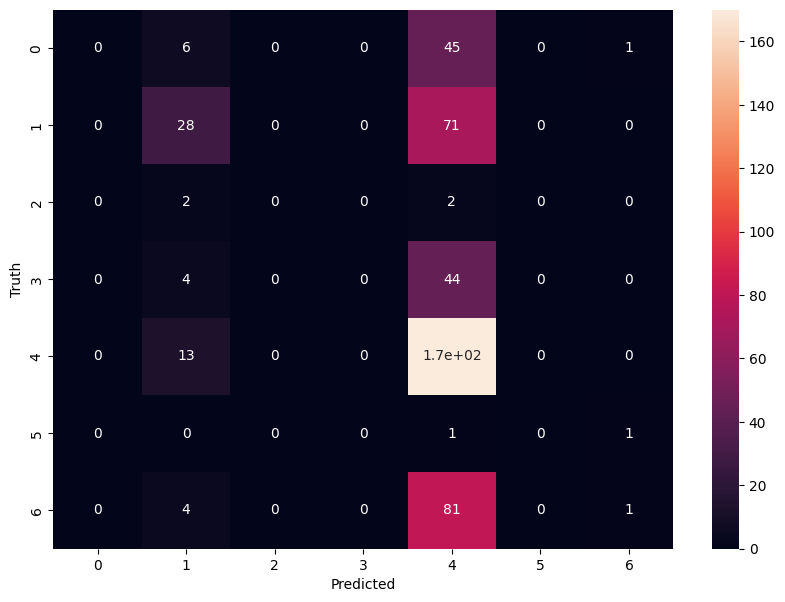

In [18]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_predicted)
print(ac)
round(ac, 3)

0.41983122362869196


0.42

In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predicted, average=None)
f1

array([0.        , 0.35897436, 0.        , 0.        , 0.56951424,
       0.        , 0.02247191])

In [21]:
from sklearn.metrics import recall_score
rs = recall_score(y_test, y_predicted, average=None)
rs

array([0.        , 0.28282828, 0.        , 0.        , 0.92896175,
       0.        , 0.01162791])

In [22]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_predicted)

ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_predicted, average=None)
ps

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.        , 0.52564103, 0.        , 0.        , 0.38502674,
       0.        , 0.22727273])

In [ ]:
print("Confusion Matrix:\n", cm)
print("\nF1 Score:", f1)
print("\nRecall Score", rs)
print("\nPrecision Score:", ps)

Confusion Matrix:
 [[  0   6   0   0  51   0   4]
 [  0  41   0   0  77   0   4]
 [  0   0   0   0   2   0   0]
 [  0   5   0   0  35   0   4]
 [  0  20   0   0 144   0   5]
 [  0   0   0   0   1   0   0]
 [  0   6   0   0  64   0   5]]

F1 Score: [0.         0.41       0.         0.         0.53038674 0.
 0.10309278]

Recall Score [0.         0.33606557 0.         0.         0.85207101 0.
 0.06666667]

Precision Score: [0.         0.52564103 0.         0.         0.38502674 0.
 0.22727273]


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


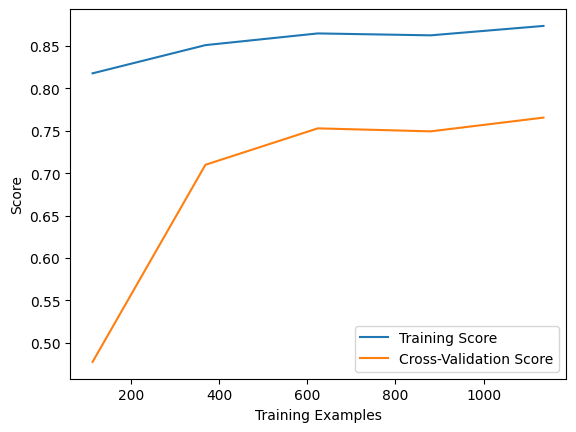

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()


In [ ]:
weighted_f1 = f1_score(y_test, y_predicted, average='weighted')
weighted_recall = recall_score(y_test, y_predicted, average='weighted')
weighted_precision = precision_score(y_test, y_predicted, average='weighted')

print("Weighted F1 Score:", weighted_f1)
print("Weighted Recall Score:", weighted_recall)
print("Weighted Precision Score:", weighted_precision)

Weighted F1 Score: 0.2562968031322462
Weighted Recall Score: 0.3649789029535865
Weighted Precision Score: 0.22443509177750648


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
